In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
complete_data = pd.read_csv('../data/curated/complete_data.csv')
complete_data.head(10)

/var/folders/mv/s3dk3thn01b8yf4vz18zfjlr0000gn/T/ipykernel_45671/604266302.py:1: DtypeWarning: Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  complete_data = pd.read_csv('../data/curated/complete_data.csv')


,Unnamed: 0,Postcode,Property Address,Bedrooms,Baths,Parking,property_type,Property Features,Weekly Rental Price,Health Instituion,...,Bus Station,Bus Distance,Bus Duration,Shopping_Center_Name,Shop Distance,Shop Duration,Count_Station,Count_Hospital,Count_School,Count_Shopping_Center
0,0,3000,CP2008/11 Rose Lane Melbourne VIC 3000,0,0,1,Carspace,[],60.0,Melbourne Oral and Facial Surgery Pty Ltd,...,King St/Lonsdale St (Melbourne City),0.4,2.0,COLLINS234 BOUTIQUE PLACE,1.0,6.0,45.0,4.0,4.0,18.0
1,1,3000,CP2008/11 Rose Lane Melbourne VIC 3000,0,0,1,Carspace,[],60.0,Melbourne Oral and Facial Surgery Pty Ltd,...,King St/Lonsdale St (Melbourne City),0.4,2.0,COLLINS234 BOUTIQUE PLACE,1.0,6.0,45.0,4.0,4.0,18.0
2,2,3000,CP2008/11 Rose Lane Melbourne VIC 3000,0,0,1,Carspace,[],60.0,Melbourne Oral and Facial Surgery Pty Ltd,...,King St/Lonsdale St (Melbourne City),0.4,2.0,COLLINS234 BOUTIQUE PLACE,1.0,6.0,45.0,4.0,4.0,18.0
3,3,3000,CP2008/11 Rose Lane Melbourne VIC 3000,0,0,1,Carspace,[],60.0,Melbourne Oral and Facial Surgery Pty Ltd,...,King St/Lonsdale St (Melbourne City),0.4,2.0,COLLINS234 BOUTIQUE PLACE,1.0,6.0,45.0,4.0,4.0,18.0
4,4,3000,CP2008/11 Rose Lane Melbourne VIC 3000,0,0,1,Carspace,[],60.0,Melbourne Oral and Facial Surgery Pty Ltd,...,King St/Lonsdale St (Melbourne City),0.4,2.0,COLLINS234 BOUTIQUE PLACE,1.0,6.0,45.0,4.0,4.0,18.0
5,5,3000,Unit 1713/200 Spencer St Melbourne VIC 3000,1,1,1,Apartment / Unit / Flat,[],440.0,Melbourne Oral and Facial Surgery Pty Ltd,...,King St/Lonsdale St (Melbourne City),0.4,2.0,COLLINS234 BOUTIQUE PLACE,1.0,6.0,45.0,4.0,4.0,18.0
6,6,3000,Unit 1713/200 Spencer St Melbourne VIC 3000,1,1,1,Apartment / Unit / Flat,[],440.0,Melbourne Oral and Facial Surgery Pty Ltd,...,King St/Lonsdale St (Melbourne City),0.4,2.0,COLLINS234 BOUTIQUE PLACE,1.0,6.0,45.0,4.0,4.0,18.0
7,7,3000,Unit 1713/200 Spencer St Melbourne VIC 3000,1,1,1,Apartment / Unit / Flat,[],440.0,Melbourne Oral and Facial Surgery Pty Ltd,...,King St/Lonsdale St (Melbourne City),0.4,2.0,COLLINS234 BOUTIQUE PLACE,1.0,6.0,45.0,4.0,4.0,18.0
8,8,3000,Unit 1713/200 Spencer St Melbourne VIC 3000,1,1,1,Apartment / Unit / Flat,[],440.0,Melbourne Oral and Facial Surgery Pty Ltd,...,King St/Lonsdale St (Melbourne City),0.4,2.0,COLLINS234 BOUTIQUE PLACE,1.0,6.0,45.0,4.0,4.0,18.0
9,9,3000,Unit 1713/200 Spencer St Melbourne VIC 3000,1,1,1,Apartment / Unit / Flat,[],440.0,Melbourne Oral and Facial Surgery Pty Ltd,...,King St/Lonsdale St (Melbourne City),0.4,2.0,COLLINS234 BOUTIQUE PLACE,1.0,6.0,45.0,4.0,4.0,18.0


In [112]:
data = complete_data[['Postcode','Baths','Population', 'Count_School', 'Count_Station','Bedrooms','Weekly Rental Price']]
data['Count_School'] = data['Count_School'].fillna(0)
data['Count_Station'] = data['Count_Station'].fillna(0)
data = data.dropna(axis=0)

data.head(10)

/var/folders/mv/s3dk3thn01b8yf4vz18zfjlr0000gn/T/ipykernel_45671/2918337103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Count_School'] = data['Count_School'].fillna(0)
/var/folders/mv/s3dk3thn01b8yf4vz18zfjlr0000gn/T/ipykernel_45671/2918337103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Count_Station'] = data['Count_Station'].fillna(0)


,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Weekly Rental Price
0,3000,0,34652.148872,4.0,45.0,0,60.0
1,3000,0,34652.148872,4.0,45.0,0,60.0
2,3000,0,34652.148872,4.0,45.0,0,60.0
3,3000,0,34652.148872,4.0,45.0,0,60.0
4,3000,0,34652.148872,4.0,45.0,0,60.0
5,3000,1,34652.148872,4.0,45.0,1,440.0
6,3000,1,34652.148872,4.0,45.0,1,440.0
7,3000,1,34652.148872,4.0,45.0,1,440.0
8,3000,1,34652.148872,4.0,45.0,1,440.0
9,3000,1,34652.148872,4.0,45.0,1,440.0


In [113]:
data = data[(data['Baths'] > 0) & (data['Bedrooms'] > 0)]

data.head(10)

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Weekly Rental Price
5,3000,1,34652.148872,4.0,45.0,1,440.0
6,3000,1,34652.148872,4.0,45.0,1,440.0
7,3000,1,34652.148872,4.0,45.0,1,440.0
8,3000,1,34652.148872,4.0,45.0,1,440.0
9,3000,1,34652.148872,4.0,45.0,1,440.0
10,3000,2,34652.148872,4.0,45.0,2,650.0
11,3000,2,34652.148872,4.0,45.0,2,650.0
12,3000,2,34652.148872,4.0,45.0,2,650.0
13,3000,2,34652.148872,4.0,45.0,2,650.0
14,3000,2,34652.148872,4.0,45.0,2,650.0


In [114]:
x_train = data[['Postcode','Baths','Population', 'Count_School', 'Count_Station','Bedrooms']]
y_train = data['Weekly Rental Price']

In [115]:
from sklearn.model_selection import train_test_split

# split the data into two groups that are training set and the testing set
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.3, shuffle=True)

In [7]:
#第一次尝试参数空间
# import the random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = {
    'n_estimators': [300,500],
    "max_features": ["sqrt", "log2"],
    "max_depth" : [10,20,30]
}

rf = RandomForestRegressor(random_state=42)

kfold=KFold(n_splits=5,shuffle=True,random_state=1)

cv = GridSearchCV(rf, parameters,cv=kfold)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}


In [8]:
#第二次尝试参数空间
parameters = {
    'n_estimators': [300,500],
    "max_features": ["sqrt", "log2"],
    "max_depth" : [30,40,50]
}

rf = RandomForestRegressor(random_state=42)

kfold=KFold(n_splits=5,shuffle=True,random_state=1)

cv = GridSearchCV(rf, parameters,cv=kfold)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}


In [9]:
#精确搜索参数空间
parameters = {"max_depth" : [26,27,28,29,30,31,32,33,34,35]}

rf = RandomForestRegressor(random_state=42,n_estimators=300,max_features='sqrt')

kfold=KFold(n_splits=5,shuffle=True,random_state=1)

cv = GridSearchCV(rf, parameters,cv=kfold)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'max_depth': 30}


Text(0.5, 1.0, 'cv error for random forest')

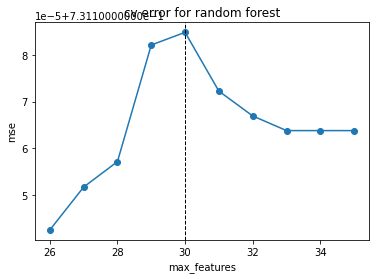

In [23]:
#画图展示交叉验证过程
cv_score=cv.cv_results_['mean_test_score']#获取训练得分
plt.plot(range(26,36),cv_score,'o-')
plt.axvline(range(26,36)[np.argmax(cv_score)],linestyle='--',color='k',linewidth=1)
plt.xlabel('max_features')
plt.ylabel('mse')
plt.title('cv error for random forest')

In [116]:
# import the random forest regressor
from sklearn.ensemble import RandomForestRegressor

# instantiate model with 200 decision trees
rf = RandomForestRegressor(random_state=42,n_estimators=300,max_features='sqrt',max_depth=30)

# train the model on training data
rf.fit(x_train_split, y_train_split)
rf.score(x_test_split,y_test_split)#计算r方

0.8660171288422933

In [117]:
# use the forest's predict method on the test data
predictions = rf.predict(x_test_split)

In [118]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [119]:
mae=mean_absolute_error(predictions,y_test_split)
mse=mean_squared_error(predictions,y_test_split)
mae,mse

(72.12651177693267, 91158.6509342396)

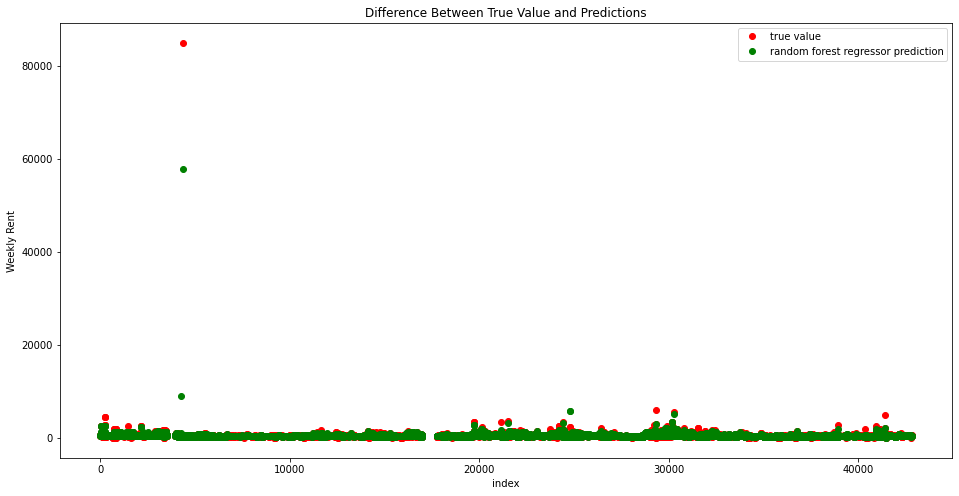

In [120]:
# plot the true amount of trips and the predictions of the random forest regressor and xgboost regressor
plt.figure(figsize=(16,8))
plt.title('Result Analysis')
plt.plot(x_test_split.index, y_test_split,'o',color = 'red',label = 'true value')
plt.plot(x_test_split.index, predictions,'o', color = 'green',label = 'random forest regressor prediction')

plt.legend()
plt.xlabel('index')
plt.ylabel('Weekly Rent')
plt.title('Difference Between True Value and Predictions')

# save the histogram
# plt.savefig('../plots/result_analysis')

plt.show()

In [121]:
population = pd.read_csv('../data/curated/predicted_population.csv')

population

,Unnamed: 0,Postcode,2021,2022,2023,2024,2025
0,0,3000,29606.0,34652.148872,34971.418045,35245.061613,35473.079574
1,1,3002,4962.0,5061.845113,4939.852221,4800.901055,4644.991613
2,2,3004,27527.0,29085.787970,29126.361312,29134.868531,29111.309626
3,3,3005,15942.0,19000.428571,20361.246753,21767.776962,23220.019198
4,4,3008,15942.0,19000.428571,20361.246753,21767.776962,23220.019198
...,...,...,...,...,...,...,...
581,581,3990,26723.0,27276.654135,28164.689679,29092.159708,30059.064222
582,582,3991,26723.0,27276.654135,28164.689679,29092.159708,30059.064222
583,583,3992,26723.0,27276.654135,28164.689679,29092.159708,30059.064222
584,584,3995,26723.0,27276.654135,28164.689679,29092.159708,30059.064222


In [122]:
post_data = complete_data[['Postcode', 'Baths','Population', 'Count_School', 'Count_Station','Bedrooms','Weekly Rental Price']]

In [123]:
pop_2023 = population[['Postcode','2023']]
pop_2024 = population[['Postcode','2024']]
pop_2025 = population[['Postcode','2025']]

In [124]:
pop_2023 = pd.merge(pop_2023, post_data, how='inner', on=['Postcode'])
pop_2023 =pop_2023.drop(labels=['Population'],axis=1) 
pop_2023 = pop_2023[['Postcode', '2023', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [125]:
pop_2023['Count_School'] = pop_2023['Count_School'].fillna(value = 0)
pop_2023['Count_Station'] = pop_2023['Count_Station'].fillna(value = 0)
pop_2023 = pop_2023.dropna(axis=0)
pop_2023 = pop_2023[(pop_2023['Baths'] > 0) & (pop_2023['Bedrooms'] > 0)]

pred_2023 = rf.predict(pop_2023)

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 2023
Feature names seen at fit time, yet now missing:
- Population

  warnings.warn(message, FutureWarning)


In [126]:
pop_2024 = pd.merge(pop_2024, post_data, how='inner', on=['Postcode'])
pop_2024 =pop_2024.drop(labels=['Population'],axis=1) 
pop_2024 = pop_2024[['Postcode', '2024', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [127]:
pop_2024['Count_School'] = pop_2024['Count_School'].fillna(value = 0)
pop_2024['Count_Station'] = pop_2024['Count_Station'].fillna(value = 0)
pop_2024 = pop_2024.dropna(axis=0)
pop_2024 = pop_2024[(pop_2024['Baths'] > 0) & (pop_2024['Bedrooms'] > 0)]
pred_2024 = rf.predict(pop_2024)

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 2024
Feature names seen at fit time, yet now missing:
- Population

  warnings.warn(message, FutureWarning)


In [128]:
pop_2025 = pd.merge(pop_2025, post_data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'],axis=1) 
pop_2025 = pop_2025[['Postcode', '2025', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [129]:
pop_2025['Count_School'] = pop_2025['Count_School'].fillna(value = 0)
pop_2025['Count_Station'] = pop_2025['Count_Station'].fillna(value = 0)
pop_2025 = pop_2025.dropna(axis=0)
pop_2025 = pop_2025[(pop_2025['Baths'] > 0) & (pop_2025['Bedrooms'] > 0)]
pred_2025 = rf.predict(pop_2025)

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 2025
Feature names seen at fit time, yet now missing:
- Population

  warnings.warn(message, FutureWarning)


In [130]:
data.insert(6, 'Pred_2023', pred_2023)

data.insert(7, 'Pred_2024', pred_2024)

data.insert(8, 'Pred_2025', pred_2025)

In [131]:
data

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Pred_2023,Pred_2024,Pred_2025,Weekly Rental Price
5,3000,1,34652.148872,4.0,45.0,1,988.390490,988.390490,988.390490,440.0
6,3000,1,34652.148872,4.0,45.0,1,988.390490,988.390490,988.390490,440.0
7,3000,1,34652.148872,4.0,45.0,1,988.390490,988.390490,988.390490,440.0
8,3000,1,34652.148872,4.0,45.0,1,988.390490,988.390490,988.390490,440.0
9,3000,1,34652.148872,4.0,45.0,1,988.390490,988.390490,988.390490,440.0
...,...,...,...,...,...,...,...,...,...,...
42824,3996,1,36889.657143,0.0,0.0,2,1232.891944,1232.891944,1232.891944,420.0
42825,3996,1,36889.657143,0.0,0.0,2,1232.891944,1232.891944,1232.891944,370.0
42826,3996,1,36889.657143,0.0,0.0,2,1232.891944,1232.891944,1232.891944,370.0
42827,3996,2,36889.657143,0.0,0.0,3,1686.406719,1686.406719,1686.406719,475.0
